<a href="https://colab.research.google.com/github/Gayatri-Surapaneni/Ted-Talks-Views-Prediction-ML/blob/main/Copy_of_Ted_Talk_Views_Prediction_ML_Project_Gayatri_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TED Talk Views** **Prediction**

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over
4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.

The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from skopt import BayesSearchCV
# from skopt.space import Real, Categorical, Integer
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Inserting the data file 
df=pd.read_csv('/content/drive/MyDrive/Copy of data_ted_talks.csv')

In [4]:
df.shape

(4005, 19)

In [5]:
#printing the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [6]:
df.head(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [7]:
df.tail(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [8]:
df.duplicated().sum()

0

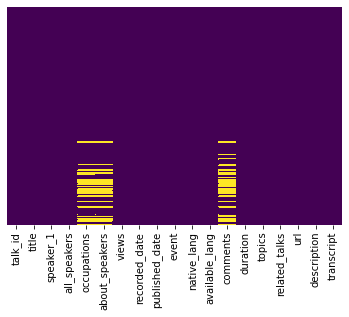

In [9]:
#checking the missing data in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (15, 5)

In [10]:
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [11]:
#dropping the url column
df=df.drop(columns=['url'])

# **3.2 Let's explore speaker_1 column**

In [12]:
#Extarcting the records of top 5 most viewed videos
pop_df=df.nlargest(5, ['views'])
pop_df[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability


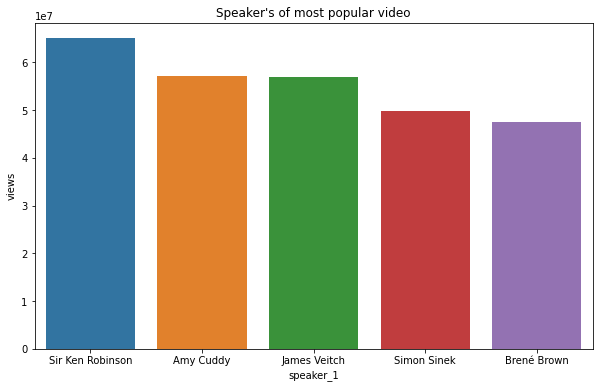

In [13]:
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular video")
sns.barplot(x='speaker_1',y='views',data=pop_df)

In [14]:
pop_speaker_df=df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(5,['views'])
pop_speaker_df.reset_index(inplace=True)
pop_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977


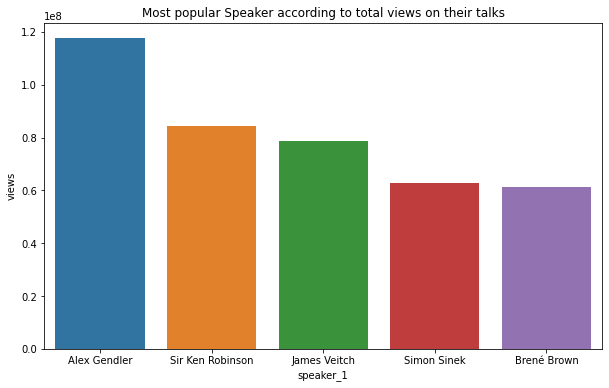

In [15]:
plt.figure(figsize=(10,6))
plt.title('Most popular Speaker according to total views on their talks')
sns.barplot(x='speaker_1',y='views',data=pop_speaker_df)

# **3.3 Let's explore the event column**

In [16]:
#printing the len of unique values in event column
len(df.event.unique())

459